<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/k_%EC%B5%9C%EA%B7%BC%EC%A0%91%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

농어 무게를 예측하는 k-최근접 알고리즘을 사용해서 회귀 model을 사용해 봤더니 정확한 예측이 어려울 수 있다는 것을 알게 됨
- 원본 데이터의 개수가 부족해서
- 한계점이 발생해서(길이가 50cm인 농어가 들어왔을 때 회귀는?)

In [22]:
#Linux 명령어: Colab의 가상머신에 나눔폰트 설치하고 적용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import numpy as np
# 농어 sample 자료
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
# sklearn 써서 훈련세트, 테스트세트 생성
# 여기서 target이 의미가 없고, 사용될 일은 없지만 생성을 위해 설정(추후 사용 예정)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 생성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

to_predict = 50 # 예측할 sample의 길이
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
predicted = knr.predict([[to_predict]])
print(predicted) # 50cm라면 나오는 무게: 약 1033g

# sklearn에 대해 자세히 알려면 참조
# https://blog.naver.com/siniphia/221396370872

[1033.33333333]


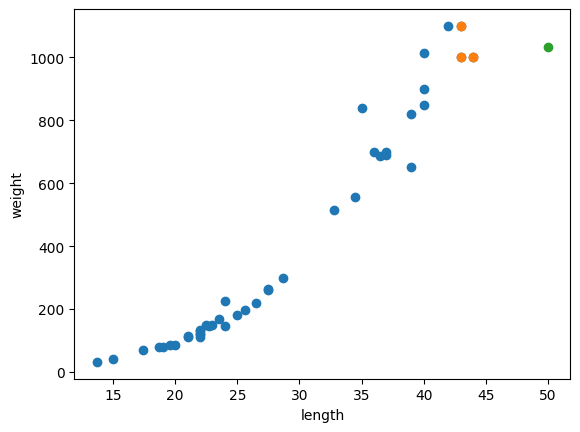

In [46]:
import matplotlib.pyplot as plt

distance, indexes = knr.kneighbors([[to_predict]])
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes])

plt.scatter(to_predict,predicted)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# data가 있는값의 평균값으로 - 최고 data를 넘었을 경우 - 50cm, 100cm 값이 같은 이유!
# 이게 바로 기본 data 부족으로 발생한 한계

In [48]:
# k-최근접 알고리즘의 대안? - 선형 회귀(linear) - 비교적 간단하고 성능이 뛰어나다!
# 직선을 학습하는 알고리즘
# 수직선, 수평선 = 수치 변화 없는 경우(ex) 수평선 - 길이 상관없이 무게 일정)
# 정비례선 (y = ax) - 일반적으로 보는 정상적인 차트
# 역비례선 (y = -ax) - 반대로 예측

from sklearn.linear_model import LinearRegression

ir = LinearRegression() # 선형 회귀용 객체 생성
ir.fit(train_input, train_target)



LinearRegression()

In [59]:
to_predict = 50
predicted = ir.predict([[to_predict]])
print(predicted)
# 발생하는 chart - y = ax+b (y: 농어의 무게, x: 농어길이, a: 기울기, b:가중치(절편)) - a값 구하기!
# 절편의 크기

[1241.83860323]


In [57]:
print(ir.coef_, ir.intercept_) # (계수, 인터셉트)
# 여기서 기울기를 계수(coefficent), 혹은 가중치(weight)라고도 부른다
# 인터셉트: 절편

[39.01714496] -709.0186449535477


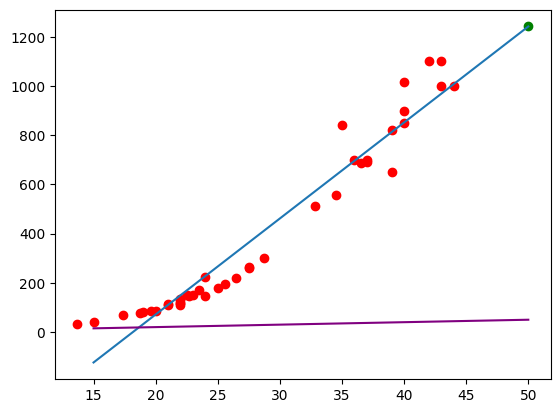

In [69]:
# 이제 그래프를 다시 그려보자!
plt.scatter(train_input, train_target, color="r")
# 선형 방정식 그래프 그리기(15에서 50까지)
plt.plot([15,50],[15*ir.coef_+ir.intercept_, 50*ir.coef_+ir.intercept_])
plt.plot([15,50],[15, 50], color="purple")
plt.scatter(to_predict, predicted, color="g")
plt.show()

# conclusion
# 예측은 가능, 그런데 값이 너무 직선적(data가 곡선형이라면?)

In [75]:
# conclusion
# 예측은 가능, 그런데 값이 너무 직선적(data가 곡선형이라면?)
print("훈련 결과:   %f" % ir.score(train_input, train_target))
print("테스트 결과: %f" %ir.score(test_input, test_target))

# 훈견세트가 테스트 세트에 비해 높지만 차이가 많이 날 때(과소평가;score 값이 0.05점 차이 이하로 나와야 한다)

훈련 결과:   0.939846
테스트 결과: 0.824750


In [77]:
# 다항 회귀(polynomial regression)
# 2차원 방정식의 graph로 그리려면 길이를 제곱한 항이 훈련세트에 추가되야 한다!
# 곡선으로 만들어야 하는 이유? - 선형회귀는 왼쪽 하단에 있는 기준점이 불일치 되는게 문제

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [79]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [83]:
ir = LinearRegression()
ir.fit(train_poly, train_target)


LinearRegression()

In [100]:
# 결과를 볼 때 model의 원래 길이의 제곱과 원래 길이를 넣는다
predicted = ir.predict([[to_predict ** 2, to_predict]])
print(predicted)

[1573.98423528]


In [89]:
# 농어의 무게 기울기 + 절편 (y = ax + b)
print(ir.coef_, ir.intercept_)
# 무게 = 1.01 * 길이^2 - 21.55 * 길이 + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


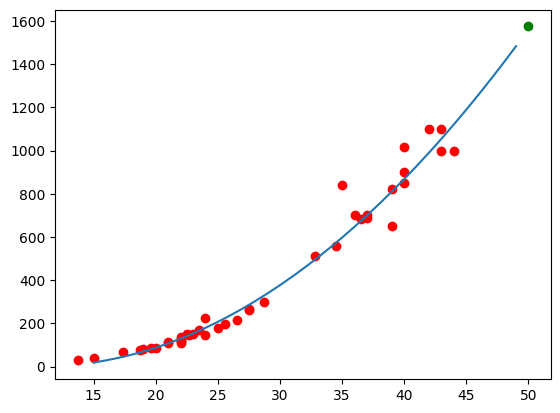

In [101]:
# 이제 그래프를 다시 그려보자!
plt.scatter(train_input, train_target, color="r")
point = np.arange(15, 50)
# 선형 방정식 그래프 그리기(15에서 50까지)
plt.plot(point, 1.01*point**2 - 21.6*point+ir.intercept_)
plt.scatter(to_predict, predicted, color="g")
plt.show()

In [99]:
print("훈련 결과:   %f" % ir.score(train_poly, train_target))
print("테스트 결과: %f" %ir.score(test_poly, test_target))

# 아직 과소적합이 남아있다: 훈련결과가 테스트 결과보다 낮음
# 더 복잡한 모델을 만들어야 할 듯 그리고 이 경우, 모델의 복잡도를 억제할 방법 생각해보자

훈련 결과:   0.970681
테스트 결과: 0.977594
